In [1]:
import pandas as pd
import numpy as np
# Import des modules spécifiques de Keras
from tensorflow.keras import layers, models
# Import de train_test_split depuis scikit-learn
from sklearn.model_selection import train_test_split
# Import de pyplot depuis matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Chargement de la dataset

In [2]:
def charger_dataset(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print(f"Erreur lors du chargement du dataset: {e}")
        return None

In [4]:
filename = r"C:\Users\pc\Downloads\BIBDA\S3\Intelligence Artificielle 2\TP 4 - Initiation à la Deep Learning\diabets\diabetes.csv"
data = charger_dataset(filename)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Séparation des features (X) et de la target (y)
X = data.drop('Outcome', axis=1)  # On enlève la colonne Outcome pour avoir uniquement les features
y = data['Outcome']               # Notre variable cible

In [6]:
# Division en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Features
    y,                # Target
    test_size=0.2,    # 20% pour le test
    train_size=0.8,   # 80% pour l'entraînement
    random_state=42   # Pour la reproductibilité
)

# Afficher les dimensions des ensembles pour vérification
print("Dimensions des ensembles:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensions des ensembles:
X_train: (614, 8)
X_test: (154, 8)
y_train: (614,)
y_test: (154,)


In [7]:
# Construction du modèle
model = Sequential([
    # Couche d'entrée explicite
    Input(shape=(8,)),
    # Première couche cachée
    Dense(10, activation='relu'),
    # Couche de sortie
    Dense(1, activation='sigmoid')
])

In [8]:
# Compilation du modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # sparse_categorical_crossentropy ne fonctionne pas
    metrics=['accuracy']
)

In [9]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:

# Entraînement du modèle
history = model.fit(
    X_train, 
    y_train,
    epochs=200,                # Nombre d'époques
    batch_size=32,           # Taille du batch (standard)
    validation_split=0.2,    # 20% des données d'entraînement pour la validation
    verbose=1               # Pour voir la progression
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5509 - loss: 0.9283 - val_accuracy: 0.5528 - val_loss: 1.0547
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6026 - loss: 0.8510 - val_accuracy: 0.5366 - val_loss: 0.9786
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5504 - loss: 0.9000 - val_accuracy: 0.5854 - val_loss: 0.9524
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5899 - loss: 0.8398 - val_accuracy: 0.5772 - val_loss: 0.9215
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5959 - loss: 0.8106 - val_accuracy: 0.5772 - val_loss: 0.9166
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5821 - loss: 0.8528 - val_accuracy: 0.5854 - val_loss: 0.9105
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5688 - loss: 0.8172 - val_accuracy: 0.5610 - val_loss: 0.9957
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6204 - loss: 0.8431 - val_accuracy: 0.5935 -

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss on test set: {test_loss}")
print(f"Accuracy on test set: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7155 - loss: 0.5628 
Loss on test set: 0.5753923058509827
Accuracy on test set: 0.701298713684082


In [13]:
# Récupérer les prédictions de probabilité
pred_probabilities = model.predict(X_test)

# Obtenir les classes prédites en prenant l'indice de la probabilité maximale
#pred_y = np.argmax(pred_probabilities, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


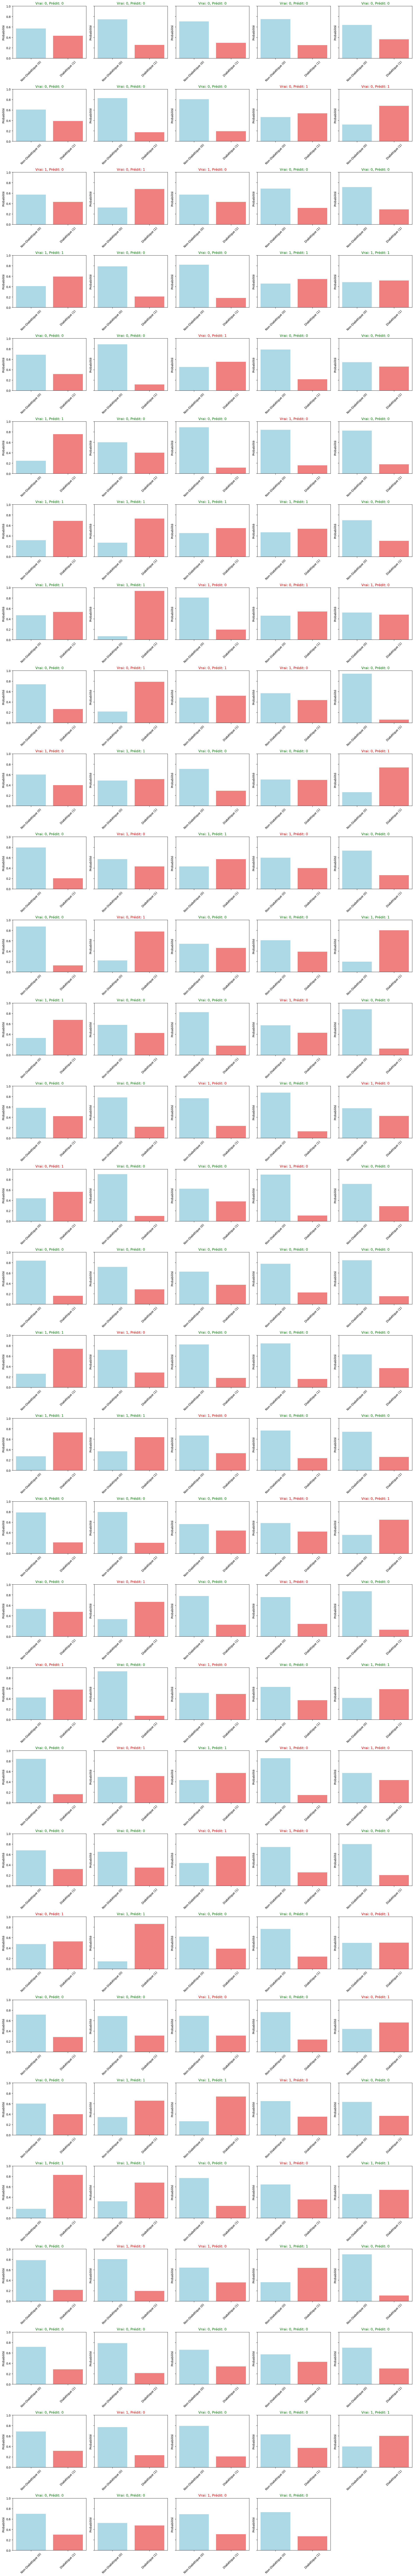

In [15]:
# Récupérer les prédictions de probabilité
pred_probabilities = model.predict(X_test)

# Convertir les probabilités en classes (0 ou 1)
pred_y = (pred_probabilities > 0.5).astype(int)

# Calculer le nombre d'échantillons de test
num_samples = len(X_test)

# Définir le nombre de colonnes et lignes pour répartir les sous-graphes
cols = 5  # Nombre de sous-graphes par ligne
rows = (num_samples + cols - 1) // cols  # Calculer le nombre de lignes nécessaires

# Créer la figure et les sous-graphes
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), sharey=True)

# Remplir les sous-graphes avec les prédictions
for i in range(num_samples):
    probability = pred_probabilities[i][0]  # Probabilité de la classe 1 (diabétique)
    true_class = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
    predicted_class = pred_y[i][0]
    
    # Calculer la position du sous-graphe
    row, col = divmod(i, cols)
    
    # Si rows est un scalar (un seul row), on doit adapter l'indexage
    if rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]
    
    # Créer les barres pour les deux classes
    ax.bar(['Non-Diabétique (0)', 'Diabétique (1)'], 
           [1-probability, probability],
           color=['lightblue', 'lightcoral'])
    
    # Ajouter le titre avec la vraie classe et la prédiction
    ax.set_title(f'Vrai: {true_class}, Prédit: {predicted_class}',
                 color='green' if true_class == predicted_class else 'red')
    
    # Configurer les axes
    ax.set_ylim(0, 1)
    ax.set_ylabel('Probabilité')
    
    # Rotation des labels pour meilleure lisibilité
    ax.tick_params(axis='x', rotation=45)

# Cacher les sous-graphes vides s'il y en a
total_subplots = rows * cols
for j in range(num_samples, total_subplots):
    row, col = divmod(j, cols)
    if rows == 1:
        fig.delaxes(axes[col])
    else:
        fig.delaxes(axes[row, col])

# Ajuster la mise en page
plt.tight_layout()
plt.show()

In [16]:
# Afficher quelques métriques de performance
from sklearn.metrics import classification_report, confusion_matrix

print("\nRapport de classification:")
print(classification_report(y_test, pred_y))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, pred_y))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.60      0.49      0.54        55

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154


Matrice de confusion:
[[81 18]
 [28 27]]
